In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
import matplotlib.font_manager as fm

# Find and select a specific font family
font_family = 'serif'
font_path = fm.findfont(fm.FontProperties(family=font_family))

In [3]:
sns.set_theme()

In [4]:
time_comm_CBLAS = pd.read_csv('../data/time_comm_CBLAS.dat', delimiter='\t',names=["rank", "size","dim","time"])
time_comm_GPU = pd.read_csv('../data/time_comm_GPU.dat', delimiter='\t',names=["rank", "size","dim","time"])
time_comp_CBLAS = pd.read_csv('../data/time_comp_CBLAS.dat', delimiter='\t',names=["rank", "size","dim","time"])
time_comp_GPU = pd.read_csv('../data/time_comp_GPU.dat', delimiter='\t',names=["rank", "size","dim","time"])

In [5]:
time_comm_CBLAS_mean={5000:{1:None,2:None,5:None,8:None,10:None}, 
                      10000:{1:None,2:None,5:None,8:None,10:None},
                      20000:{1:None,2:None,5:None,8:None,10:None}, 
                      25000:{1:None,2:None,5:None,8:None,10:None}}
time_comp_CBLAS_mean={5000:{1:None,2:None,5:None,8:None,10:None}, 
                      10000:{1:None,2:None,5:None,8:None,10:None},
                      20000:{1:None,2:None,5:None,8:None,10:None}, 
                      25000:{1:None,2:None,5:None,8:None,10:None}}
time_comm_GPU_mean={5000:{1:None,2:None,5:None,8:None,10:None}, 
                      10000:{1:None,2:None,5:None,8:None,10:None},
                      20000:{1:None,2:None,5:None,8:None,10:None}, 
                      25000:{1:None,2:None,5:None,8:None,10:None}}
time_comp_GPU_mean={5000:{1:None,2:None,5:None,8:None,10:None}, 
                      10000:{1:None,2:None,5:None,8:None,10:None},
                      20000:{1:None,2:None,5:None,8:None,10:None}, 
                      25000:{1:None,2:None,5:None,8:None,10:None}}

for dim in [5000, 10000, 20000, 25000]:
    for k in [1,2,5,8,10]:
        time_comm_CBLAS_mean[dim][k] = np.mean(
            [time_comm_CBLAS["time"][i] for i in range(len(time_comm_CBLAS)) 
             if np.logical_and(time_comm_CBLAS["size"][i]==k, time_comm_CBLAS["dim"][i]==dim)]) 

        time_comp_CBLAS_mean[dim][k]=np.mean(
            [time_comp_CBLAS["time"][i] for i in range(len(time_comp_CBLAS)) 
             if np.logical_and(time_comp_CBLAS["size"][i]==k, time_comp_CBLAS["dim"][i]==dim)]) 

        time_comm_GPU_mean[dim][k]=np.mean(
            [time_comm_GPU["time"][i] for i in range(len(time_comm_GPU)) 
             if np.logical_and(time_comm_GPU["size"][i]==k, time_comm_GPU["dim"][i]==dim)]) 

        time_comp_GPU_mean[dim][k]=np.mean(
            [time_comp_GPU["time"][i] for i in range(len(time_comp_GPU)) 
             if np.logical_and(time_comp_GPU["size"][i]==k, time_comp_GPU["dim"][i]==dim)]) 

In [6]:
def plot_bars(ax, data_dict, dim, label="Communication Time", n_bars=1, pos=1, color="green"):
    width=0.3
    ax.bar([1+pos*width/n_bars,2+pos*width/n_bars,5+pos*width/n_bars,10+pos*width/n_bars],
            [data_dict[dim][i] for i in [1,2,5,10]], 
            color=color, label=label,width=width)
    return ax

In [46]:
dim=25000

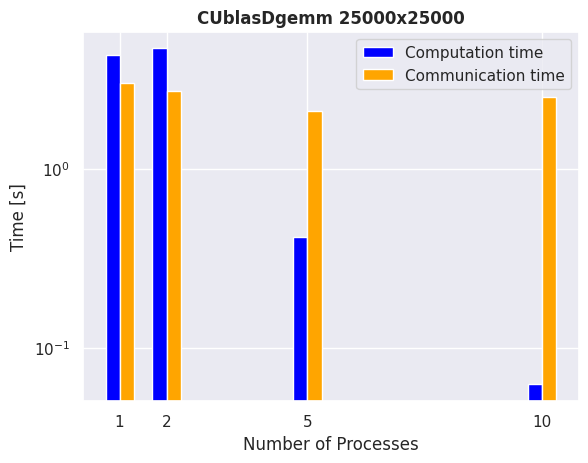

In [47]:
ax1 = plt.subplot()
plot_bars(ax1,time_comp_GPU_mean,dim, label="Computation time", color="blue",pos=-1,n_bars=2)
plot_bars(ax1,time_comm_GPU_mean,dim, label="Communication time", color="orange",pos=1, n_bars=2)
plt.xticks([1,2,5,10])
ax1.legend()
plt.yscale('log')
plt.title(f"CUblasDgemm {dim}x{dim}",fontweight='bold')
plt.xlabel("Number of Processes",fontweight=500)
ax1.set_ylabel("Time [s]",fontweight=500)
plt.savefig(f"CUblasDgemm_{dim}.png")

In [ ]:
ax1 = plt.subplot()
plot_bars(ax1,time_comp_CBLAS_mean,dim, label="Computation time", color="blue",pos=-1,n_bars=2)
plot_bars(ax1,time_comm_CBLAS_mean,dim, label="Communication time", color="orange",pos=1, n_bars=2)
plt.xticks([1,2,5,10])
ax1.legend()
plt.yscale('log')
plt.title(f"CblasDgemm {dim}x{dim}",fontweight='bold')
plt.xlabel("Number of Processes",fontweight=500)
ax1.set_ylabel("Time [s]",fontweight=500)
plt.savefig(f"CblasDgemm_{dim}.png")